<a href="https://colab.research.google.com/github/boropx999/hello-world/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar10

In [ ]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

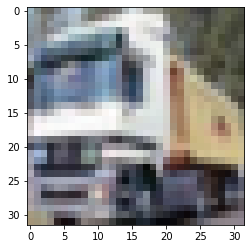

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])
plt.show()

In [ ]:
import numpy as np
from keras.utils import np_utils
x_train = x_train.reshape(50000,3072)
x_test = x_test.reshape(10000,3072)
x_train = x_train.astype('float32')
x_test= x_test.astype('float32')
x_train/= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [ ]:
import matplotlib.pyplot as plt 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Conv2D
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import scale,StandardScaler

In [ ]:
#tạo mạng nơ-ron
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 512)               1573376   
                                                                 
 dropout_20 (Dropout)        (None, 512)               0         
                                                                 
 dense_30 (Dense)            (None, 512)               262656    
                                                                 
 dropout_21 (Dropout)        (None, 512)               0         
                                                                 
 dense_31 (Dense)            (None, 10)                5130      
                                                                 
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,batch_size=128,epochs=500,verbose=1,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience = 80)])

Epoch 1/500
313/313 [==============================] - 12s 36ms/step - loss: 2.2091 - accuracy: 0.2415 - val_loss: 1.9111 - val_accuracy: 0.3104
Epoch 2/500
313/313 [==============================] - 11s 36ms/step - loss: 1.8485 - accuracy: 0.3327 - val_loss: 1.7542 - val_accuracy: 0.3731
Epoch 3/500
313/313 [==============================] - 12s 38ms/step - loss: 1.7625 - accuracy: 0.3679 - val_loss: 1.8076 - val_accuracy: 0.3585
Epoch 4/500
313/313 [==============================] - 11s 36ms/step - loss: 1.7058 - accuracy: 0.3896 - val_loss: 1.7209 - val_accuracy: 0.3932
Epoch 5/500
313/313 [==============================] - 11s 36ms/step - loss: 1.6608 - accuracy: 0.4053 - val_loss: 1.6657 - val_accuracy: 0.4033
Epoch 6/500
313/313 [==============================] - 11s 36ms/step - loss: 1.6237 - accuracy: 0.4184 - val_loss: 1.6880 - val_accuracy: 0.3937
Epoch 7/500
313/313 [==============================] - 11s 35ms/step - loss: 1.5926 - accuracy: 0.4290 - val_loss: 1.6352 - val_ac

In [ ]:
score = model.evaluate(x_test,y_test,verbose = 0)
print('Test lost', score[0])
print('Test accuracy', score[1])

Test lost 1.610620141029358
Test accuracy 0.4893999993801117


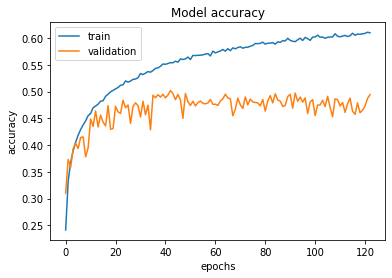

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'])
plt.show()